In [1]:
#import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from sodapy import Socrata

In [4]:
#url = "https://healthdata.gov/resource/g62h-syeh.json"
 
#response = requests.get(url)
 
#print("Status Code", response.status_code)

#response = response.json()
#response[10]

Status Code 200


In [2]:
# Mas info: https://dev.socrata.com/foundry/healthdata.gov/g62h-syeh

client = Socrata("healthdata.gov", None)

results = client.get("g62h-syeh", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [5]:
print(results_df.head(3))
print(results_df.shape)

  state                     date critical_staffing_shortage_today_yes  \
0    PR  2020-12-23T00:00:00.000                                   11   
1    OR  2020-12-22T00:00:00.000                                    5   
2    VI  2020-10-16T00:00:00.000                                    1   

  critical_staffing_shortage_today_no  \
0                                  51   
1                                  55   
2                                   1   

  critical_staffing_shortage_today_not_reported  \
0                                             5   
1                                             2   
2                                             0   

  critical_staffing_shortage_anticipated_within_week_yes  \
0                                                 12       
1                                                  7       
2                                                  2       

  critical_staffing_shortage_anticipated_within_week_no  \
0                                    

# Desarrollo del analisis usando el csv

In [2]:
df_report = pd.read_csv("Datasets/COVID_19_reported.csv", parse_dates=["date"])

In [3]:
print(df_report.head(3))
#print(df_report.shape)

  state       date  critical_staffing_shortage_today_yes  \
0    PR 2020-12-23                                    11   
1    OR 2020-12-22                                     5   
2    VI 2020-10-16                                     1   

   critical_staffing_shortage_today_no  \
0                                   51   
1                                   55   
2                                    1   

   critical_staffing_shortage_today_not_reported  \
0                                              5   
1                                              2   
2                                              0   

   critical_staffing_shortage_anticipated_within_week_yes  \
0                                                 12        
1                                                  7        
2                                                  2        

   critical_staffing_shortage_anticipated_within_week_no  \
0                                                 50       
1               

In [4]:
df_mask = df_report['date']<= '2020-08-01'
df = df_report[df_mask]

df.sort_values(by='date', ascending = True,
                 inplace = True)
df = df.reset_index()

C:\Users\hector hugo\AppData\Local\Temp\ipykernel_16148\1400115934.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='date', ascending = True,


In [5]:
print(df.tail(3))
print(df.shape)

      index state       date  critical_staffing_shortage_today_yes  \
8387   5005    NV 2020-08-01                                     8   
8388   7895    NY 2020-08-01                                     9   
8389   9846    WI 2020-08-01                                     6   

      critical_staffing_shortage_today_no  \
8387                                   53   
8388                                  106   
8389                                   44   

      critical_staffing_shortage_today_not_reported  \
8387                                              1   
8388                                             44   
8389                                             83   

      critical_staffing_shortage_anticipated_within_week_yes  \
8387                                                  9        
8388                                                  7        
8389                                                  6        

      critical_staffing_shortage_anticipated_within_week_no 

In [68]:
print(df.columns)

Index(['index', 'state', 'date', 'critical_staffing_shortage_today_yes',
       'critical_staffing_shortage_today_no',
       'critical_staffing_shortage_today_not_reported',
       'critical_staffing_shortage_anticipated_within_week_yes',
       'critical_staffing_shortage_anticipated_within_week_no',
       'critical_staffing_shortage_anticipated_within_week_not_reported',
       'hospital_onset_covid',
       ...
       'previous_day_admission_pediatric_covid_confirmed_5_11',
       'previous_day_admission_pediatric_covid_confirmed_5_11_coverage',
       'previous_day_admission_pediatric_covid_confirmed_unknown',
       'previous_day_admission_pediatric_covid_confirmed_unknown_coverage',
       'staffed_icu_pediatric_patients_confirmed_covid',
       'staffed_icu_pediatric_patients_confirmed_covid_coverage',
       'staffed_pediatric_icu_bed_occupancy',
       'staffed_pediatric_icu_bed_occupancy_coverage',
       'total_staffed_pediatric_icu_beds',
       'total_staffed_pediatric_i

1 -  ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo). ¿Influye el rango etario en este comportamiento?

In [79]:
df_mask = df['date']<= '2020-07-01'
df1 = df[df_mask]

df1.sort_values(by='date', ascending = True,
                 inplace = True)
df1 = df1.reset_index()

df1 = df1[['date','state','total_adult_patients_hospitalized_confirmed_covid']]

C:\Users\hector hugo\AppData\Local\Temp\ipykernel_1488\754319086.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values(by='date', ascending = True,


In [80]:
print(df1.head())


# Reported patients currently hospitalized in an adult inpatient bed who have laboratory-confirmed COVID-19. This include those in observation beds.
df1['total_adult_patients_hospitalized_confirmed_covid'].sum()

        date state  total_adult_patients_hospitalized_confirmed_covid
0 2020-01-01    NC                                                NaN
1 2020-01-01    IN                                                NaN
2 2020-01-01    MT                                                NaN
3 2020-01-01    TX                                                NaN
4 2020-01-01    LA                                                NaN


110108.0

In [81]:
df1 = df1.groupby(['state'])['total_adult_patients_hospitalized_confirmed_covid'].sum().sort_values(ascending=False)


In [87]:
print(df1[:5])

state
LA    40881.0
CA    36243.0
NV    20224.0
AZ     5557.0
IA     3187.0
Name: total_adult_patients_hospitalized_confirmed_covid, dtype: float64


2 - Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:
- Intervalos de crecimiento y decrecimiento
- Puntos críticos (mínimos y máximos)

In [103]:
df_mask = df['date']< '2020-07-01'

df2 = df[df_mask] 

df_mask2 = df2['state'] == "NY"
df2 = df2[df_mask2] 

df2.sort_values(by='date', ascending = True,
                 inplace = True)
df2 = df2.reset_index()

# inpatient_beds_utilization =  Percentage of inpatient beds that are being utilized in this state. This number only accounts for hospitals in the state that report both "inpatient_beds_used" and "inpatient_beds" fields.

df2 = df2[['date','state','inpatient_beds_utilization']]

In [104]:
print(df2.tail())

          date state  inpatient_beds_utilization
104 2020-06-26    NY                    0.697932
105 2020-06-27    NY                    0.671546
106 2020-06-28    NY                    0.654521
107 2020-06-29    NY                    0.678607
108 2020-06-30    NY                    0.696238


In [113]:
print(df2['inpatient_beds_utilization'].mean())

0.6943263624725792


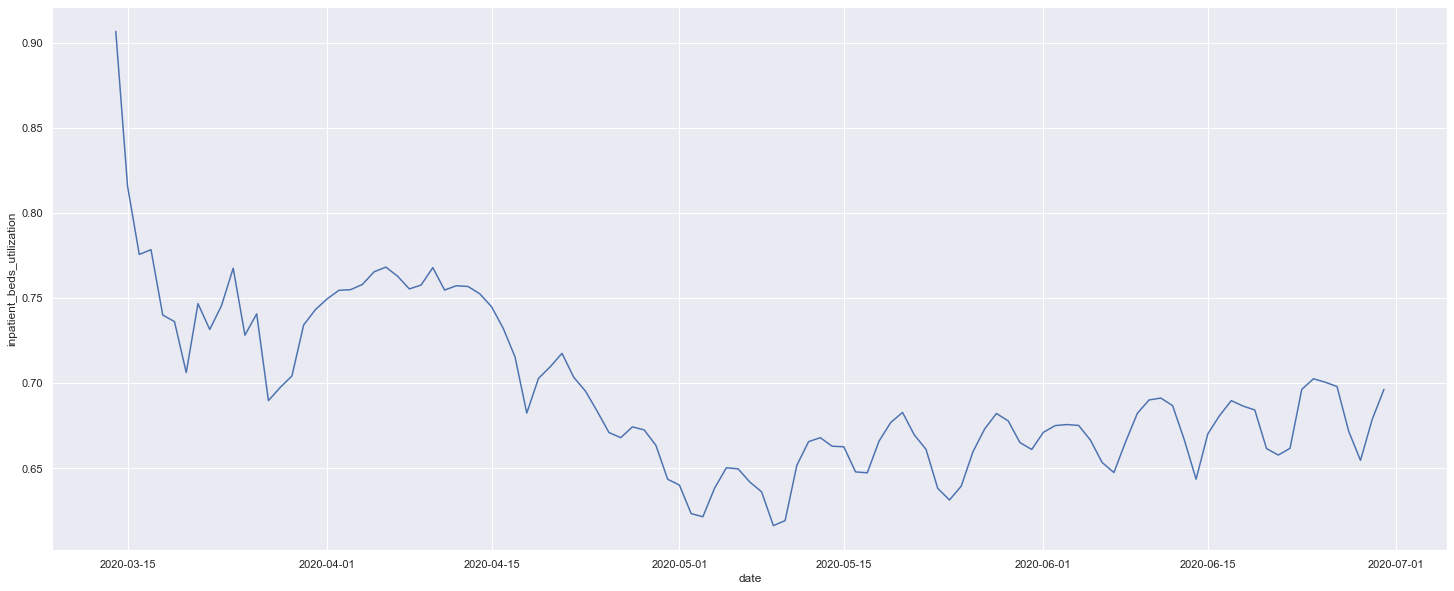

In [105]:
sns.set(rc = {'figure.figsize':(25,10)})
sns.lineplot(data=df2, x="date", y="inpatient_beds_utilization")

plt.show()

3 - ¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.

In [119]:
# staffed_icu_adult_patients_confirmed_covid = 29. Reported patients currently hospitalized in an adult ICU bed who have confirmed COVID-19 in this state

df_mask = df['state'] == 'staffed_icu_adult_patients_confirmed_covid'
df3 = df[df_mask] 

df3.sort_values(by='date', ascending = True,
                 inplace = True)
df3 = df3.reset_index()


df3 = df[['date','state','staffed_icu_adult_patients_confirmed_covid']]

C:\Users\hector hugo\AppData\Local\Temp\ipykernel_1488\2010084509.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.sort_values(by='date', ascending = True,


In [120]:
print(df3.tail(3))

           date state  staffed_icu_adult_patients_confirmed_covid
8387 2020-08-01    NV                                       316.0
8388 2020-08-01    NY                                       110.0
8389 2020-08-01    WI                                       127.0


In [121]:
df3 = df3.groupby(['state'])['staffed_icu_adult_patients_confirmed_covid'].sum().sort_values(ascending=False)

In [122]:
print(df3[:5])

state
TX    42572.0
FL    33445.0
CA    29125.0
AZ    11967.0
GA     9903.0
Name: staffed_icu_adult_patients_confirmed_covid, dtype: float64


4 - ¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?

In [67]:
# total_pediatric_patients_hospitalized_confirmed_covid -> 37:Reported patients currently hospitalized in a pediatric inpatient bed, including NICU, newborn, and nursery, who are laboratory-confirmed-positive for COVID-19. This include those in observation beds

df_mask = df_report['date'] < '2021-01-01'
df_4 = df_report[df_mask]

df_4.sort_values(by='date', ascending = True,
                 inplace = True)
df_4 = df_4.reset_index()


df_4 = df_4[['date','state','total_pediatric_patients_hospitalized_confirmed_covid']]
df_4['month'] = pd.to_datetime(df_4['date']).dt.month

C:\Users\hector hugo\AppData\Local\Temp\ipykernel_18848\3353392983.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4.sort_values(by='date', ascending = True,


In [68]:
print(df_4.tail(3))

            date state  total_pediatric_patients_hospitalized_confirmed_covid  \
16443 2020-12-31    IA                                                7.0       
16444 2020-12-31    TN                                               27.0       
16445 2020-12-31    MI                                               20.0       

       month  
16443     12  
16444     12  
16445     12  


In [69]:
df_4 = df_4.groupby(['state'])['total_pediatric_patients_hospitalized_confirmed_covid'].sum().sort_values(ascending=False)

In [70]:
print(df_4[0:25])

state
TX    12574.0
CA     9909.0
FL     7411.0
AZ     5710.0
PA     5682.0
IL     5254.0
GA     5049.0
NY     4815.0
TN     3860.0
OK     3356.0
CO     3209.0
OH     3133.0
MO     3050.0
AL     2879.0
NC     2268.0
NJ     2075.0
MN     2027.0
NE     2020.0
VA     1843.0
SD     1758.0
MI     1724.0
AR     1698.0
IN     1465.0
MA     1390.0
NV     1117.0
Name: total_pediatric_patients_hospitalized_confirmed_covid, dtype: float64


5 - ¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.

In [151]:
# staffed_icu_adult_patients_confirmed_covid -> 29. Reported patients currently hospitalized in an adult ICU bed who have confirmed COVID-19 in this state
# total_staffed_adult_icu_beds -> 39.  Reported total number of staffed inpatient adult ICU beds in this state
 
# Trabajamos con df, que tiene los registros hasta el 1/8/20

df_5 = df[['date','state','staffed_icu_adult_patients_confirmed_covid', 'total_staffed_adult_icu_beds']]
df_5['percent_icu_beds_covid_confirmed'] = df_5['staffed_icu_adult_patients_confirmed_covid'] / df_5['total_staffed_adult_icu_beds']

C:\Users\hector hugo\AppData\Local\Temp\ipykernel_5648\69717395.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5['percent_icu_beds_covid_confirmed'] = df_5['staffed_icu_adult_patients_confirmed_covid'] / df_5['total_staffed_adult_icu_beds']


In [152]:
#print(df_5.tail())
print(df_5.sort_values(["percent_icu_beds_covid_confirmed"],ascending=True))

           date state  staffed_icu_adult_patients_confirmed_covid  \
6763 2020-07-02    IA                                         0.0   
7950 2020-07-24    VT                                         0.0   
7985 2020-07-25    VT                                         0.0   
4584 2020-05-22    NE                                         0.0   
4656 2020-05-23    NE                                         0.0   
...         ...   ...                                         ...   
8012 2020-07-25    ND                                         NaN   
8025 2020-07-26    ND                                         NaN   
8026 2020-07-26    PR                                         0.0   
8106 2020-07-27    ND                                         NaN   
8121 2020-07-27    PR                                         0.0   

      total_staffed_adult_icu_beds  percent_icu_beds_covid_confirmed  
6763                          23.0                               0.0  
7950                         

Existen registros donde staffed_icu_adult_patients_confirmed_covid > total_staffed_adult_icu_beds, no deberia ocurrir esto por lo que se inspecciona cunatos son y si son pocos se los elimina.

In [153]:
df_mask = df_5['staffed_icu_adult_patients_confirmed_covid'] > df_5['total_staffed_adult_icu_beds']
print(df_5[df_mask].shape)


(61, 5)


Son 61 de un total de 8360, por lo que son eliminados

In [154]:
indexNames = df_5[ (df_5['staffed_icu_adult_patients_confirmed_covid'] > df_5['total_staffed_adult_icu_beds'])
               ].index
df_5.drop(indexNames , inplace=True)

C:\Users\hector hugo\AppData\Local\Temp\ipykernel_5648\887485635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5.drop(indexNames , inplace=True)


In [155]:
print(df_5.shape)


(8329, 5)


In [156]:
df_5 = df_5.reset_index(drop=True)

In [157]:
print(df_5.head())

        date state  staffed_icu_adult_patients_confirmed_covid  \
0 2020-01-01    NC                                         NaN   
1 2020-01-01    IN                                         NaN   
2 2020-01-01    MT                                         NaN   
3 2020-01-01    TX                                         NaN   
4 2020-01-01    LA                                         NaN   

   total_staffed_adult_icu_beds  percent_icu_beds_covid_confirmed  
0                           NaN                               NaN  
1                           NaN                               NaN  
2                           NaN                               NaN  
3                           NaN                               NaN  
4                           NaN                               NaN  


Cuantos registros tienen NaN para las 3 columnas?

In [158]:
df_5['percent_icu_beds_covid_confirmed'].isna().sum()

7301

In [159]:
df_5['total_staffed_adult_icu_beds'].isna().sum()

7003

In [140]:
df_5['staffed_icu_adult_patients_confirmed_covid'].isna().sum()

6966

Se eliminan esos registros

In [160]:
df_mask = df_5['percent_icu_beds_covid_confirmed'].isna()
print(df_5[df_mask].head(3))




indexNames = df_5[ (df_5['percent_icu_beds_covid_confirmed'].isna())
               ].index
df_5.drop(indexNames , inplace=True)

        date state  staffed_icu_adult_patients_confirmed_covid  \
0 2020-01-01    NC                                         NaN   
1 2020-01-01    IN                                         NaN   
2 2020-01-01    MT                                         NaN   

   total_staffed_adult_icu_beds  percent_icu_beds_covid_confirmed  
0                           NaN                               NaN  
1                           NaN                               NaN  
2                           NaN                               NaN  


In [161]:
df_5 = df_5.reset_index(drop=True)

In [162]:
print(df_5.head())
print(df_5.shape)

        date state  staffed_icu_adult_patients_confirmed_covid  \
0 2020-01-02    NV                                       397.0   
1 2020-01-03    NV                                       397.0   
2 2020-01-04    AR                                         0.0   
3 2020-01-04    NV                                       397.0   
4 2020-01-05    AR                                         0.0   

   total_staffed_adult_icu_beds  percent_icu_beds_covid_confirmed  
0                         903.0                          0.439646  
1                         903.0                          0.439646  
2                           6.0                          0.000000  
3                         903.0                          0.439646  
4                           6.0                          0.000000  
(1028, 5)


In [163]:
df_5 = df_5.sort_values(["percent_icu_beds_covid_confirmed"],ascending=False)

In [164]:
print(df_5.head(10))

          date state  staffed_icu_adult_patients_confirmed_covid  \
138 2020-07-14    IA                                        23.0   
404 2020-07-20    AZ                                       649.0   
422 2020-07-21    AZ                                       654.0   
271 2020-07-17    MS                                       245.0   
85  2020-06-23    IA                                        21.0   
567 2020-07-24    AZ                                       767.0   
309 2020-07-18    AZ                                       554.0   
511 2020-07-23    AZ                                       750.0   
146 2020-07-15    AZ                                       571.0   
342 2020-07-19    GA                                       484.0   

     total_staffed_adult_icu_beds  percent_icu_beds_covid_confirmed  
138                          23.0                          1.000000  
404                         649.0                          1.000000  
422                         663.0        

In [165]:
df_5 = df_5.reset_index(drop=True)
print(df_5)

           date state  staffed_icu_adult_patients_confirmed_covid  \
0    2020-07-14    IA                                        23.0   
1    2020-07-20    AZ                                       649.0   
2    2020-07-21    AZ                                       654.0   
3    2020-07-17    MS                                       245.0   
4    2020-06-23    IA                                        21.0   
...         ...   ...                                         ...   
1023 2020-07-28    VT                                         0.0   
1024 2020-06-15    NE                                         0.0   
1025 2020-07-02    IA                                         0.0   
1026 2020-05-23    NE                                         0.0   
1027 2020-05-27    IA                                         0.0   

      total_staffed_adult_icu_beds  percent_icu_beds_covid_confirmed  
0                             23.0                          1.000000  
1                            

La medida va a ser promedio mensual de ocupacion por mes

In [166]:
df_5['month'] =  pd.to_datetime(df_5['date']).dt.month

In [167]:
df_5 = df_5.groupby(['state','month'])['percent_icu_beds_covid_confirmed'].mean()

In [173]:
print(df_5.head(20))

state  month
AK     7        0.053670
       8        0.069767
AL     7        0.333100
       8        0.342967
AR     1        0.000000
       7        0.363431
       8        0.284281
AZ     7        0.803905
       8        0.613428
CA     7        0.380283
       8        0.260063
CO     7        0.104662
       8        0.095588
CT     7        0.086156
       8        0.008671
DC     7        0.277752
       8        0.044554
DE     7        0.378676
       8        0.212766
FL     7        0.408524
Name: percent_icu_beds_covid_confirmed, dtype: float64


## Falta agrupar por estado

6 - ¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?

In [16]:

df_mask = df_report['date'] < '2022-01-01'
df_6 = df_report[df_mask]

df_mask = df_6['date'] >= '2021-01-01'
df_6 = df_6[df_mask]

df_6.sort_values(by='date', ascending = True,
                 inplace = True)
df_6 = df_6.reset_index()

# Number of patients with suspected or confirmed COVID-19 who died on the previous calendar day in the hospital, ED, or overflow location
df_6 = df_6[['date','state','deaths_covid']]


In [17]:
print(df_6.head())
#print(df_6.tail())

        date state  deaths_covid
0 2021-01-01    IL          64.0
1 2021-01-01    OK          41.0
2 2021-01-01    KS          12.0
3 2021-01-01    MI          41.0
4 2021-01-01    AR          25.0


<AxesSubplot:xlabel='state'>

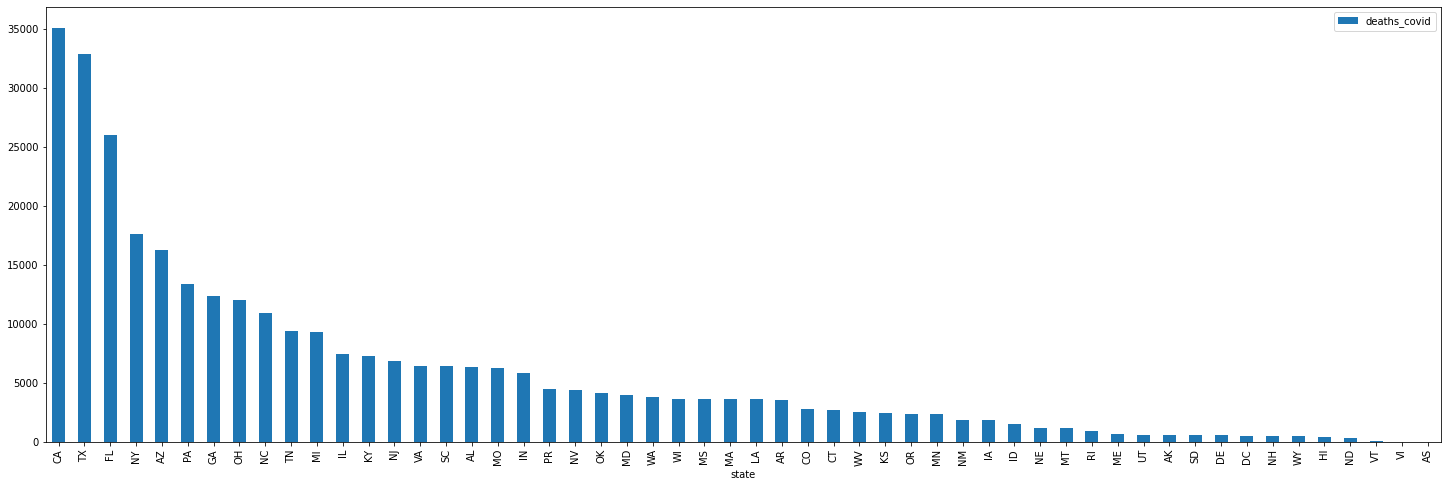

In [20]:
df_6.groupby(['state'])['deaths_covid'].sum().sort_values(ascending=False).plot(kind='bar',legend='Reverse',figsize = (25, 8))

In [21]:
df_6_groupby = df_6.groupby(['state'])['deaths_covid'].sum().sort_values(ascending=False)
print("Top 10estados con mas muertos durante el 2021: ",df_6_groupby[:10])

Top 10estados con mas muertos durante el 2021:  state
CA    35108.0
TX    32889.0
FL    26004.0
NY    17620.0
AZ    16250.0
PA    13363.0
GA    12338.0
OH    12023.0
NC    10922.0
TN     9439.0
Name: deaths_covid, dtype: float64


7 - ¿Qué relación presenta la falta de personal médico, con la cantidad de muertes por covid durante el año 2021?

In [21]:
df_mask = df_report['date'] < '2022-01-01'
df_7 = df_report[df_mask]

df_mask = df_7['date'] >= '2021-01-01'
df_7 = df_7[df_mask]

df_7.sort_values(by='date', ascending = True,
                 inplace = True)
df_7 = df_7.reset_index(drop=True)


# critical_staffing_shortage_today_yes -> 3. Number of hospitals reporting a critical staffing shortage today in this state.
# deaths_covid -> Number of patients with suspected or confirmed COVID-19 who died on the previous calendar day in the hospital, ED, or overflow location
df_7 = df_7[['date','state','deaths_covid','critical_staffing_shortage_today_yes']]

In [22]:
print(df_7.head())

        date state  deaths_covid  critical_staffing_shortage_today_yes
0 2021-01-01    IL          64.0                                    16
1 2021-01-01    OK          41.0                                    45
2 2021-01-01    KS          12.0                                    10
3 2021-01-01    MI          41.0                                    21
4 2021-01-01    AR          25.0                                    18


Se va a analizar por periodos semanales

In [23]:
df_7['month'] = df_7['date'].dt.month
df_7['Week_Number'] = df_7['date'].dt.week

C:\Users\hector hugo\AppData\Local\Temp\ipykernel_12020\2928596701.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_7['Week_Number'] = df_7['date'].dt.week


In [24]:
print(df_7.iloc[400:420])

          date state  deaths_covid  critical_staffing_shortage_today_yes  \
400 2021-01-08    ND           1.0                                    19   
401 2021-01-08    IL          63.0                                    22   
402 2021-01-08    TX         239.0                                   166   
403 2021-01-08    NM          12.0                                    22   
404 2021-01-08    FL          83.0                                     8   
405 2021-01-08    IN          44.0                                    23   
406 2021-01-08    HI           0.0                                     2   
407 2021-01-08    TN          64.0                                    33   
408 2021-01-08    CT          21.0                                     4   
409 2021-01-08    MO          43.0                                    23   
410 2021-01-08    MN          14.0                                    20   
411 2021-01-08    OH          67.0                                    26   
412 2021-01-

In [32]:
df_7_deaths = df_7.groupby(['state','Week_Number'])['deaths_covid'].sum()

In [33]:
df_7_staffing = df_7.groupby(['state','Week_Number'])['critical_staffing_shortage_today_yes'].sum()

In [34]:
print(df_7_deaths.head(3))

state  Week_Number
AK     1              9.0
       2              5.0
       3              3.0
Name: deaths_covid, dtype: float64


In [37]:
print(df_7_staffing['AK'].head(3))

Week_Number
1    7
2    7
3    7
Name: critical_staffing_shortage_today_yes, dtype: int64


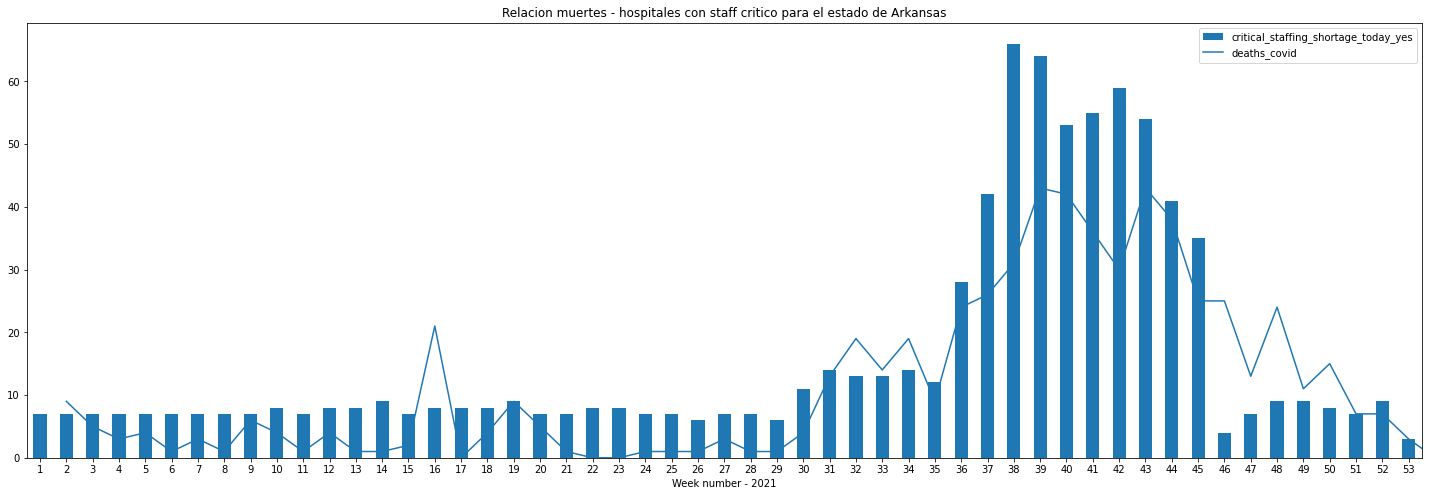

In [45]:
plt.figure(figsize = (25, 8))

df_7_staffing['AK'].plot(kind='bar',legend='Reverse')
df_7_deaths['AK'].plot(kind='line',legend='Reverse')

plt.xlabel("Week number - 2021")

plt.title("Relacion muertes - hospitales con staff critico para el estado de Arkansas")

plt.show()

Medida global

In [46]:
df_7_deaths_global = df_7.groupby(['Week_Number'])['deaths_covid'].sum()
df_7_staffing_global = df_7.groupby(['Week_Number'])['critical_staffing_shortage_today_yes'].sum()

In [47]:
print(df_7_deaths_global.head(3))

Week_Number
1    15971.0
2    15990.0
3    14954.0
Name: deaths_covid, dtype: float64


In [48]:
print(df_7_staffing_global.head(3))

Week_Number
1    7643
2    7501
3    7006
Name: critical_staffing_shortage_today_yes, dtype: int64


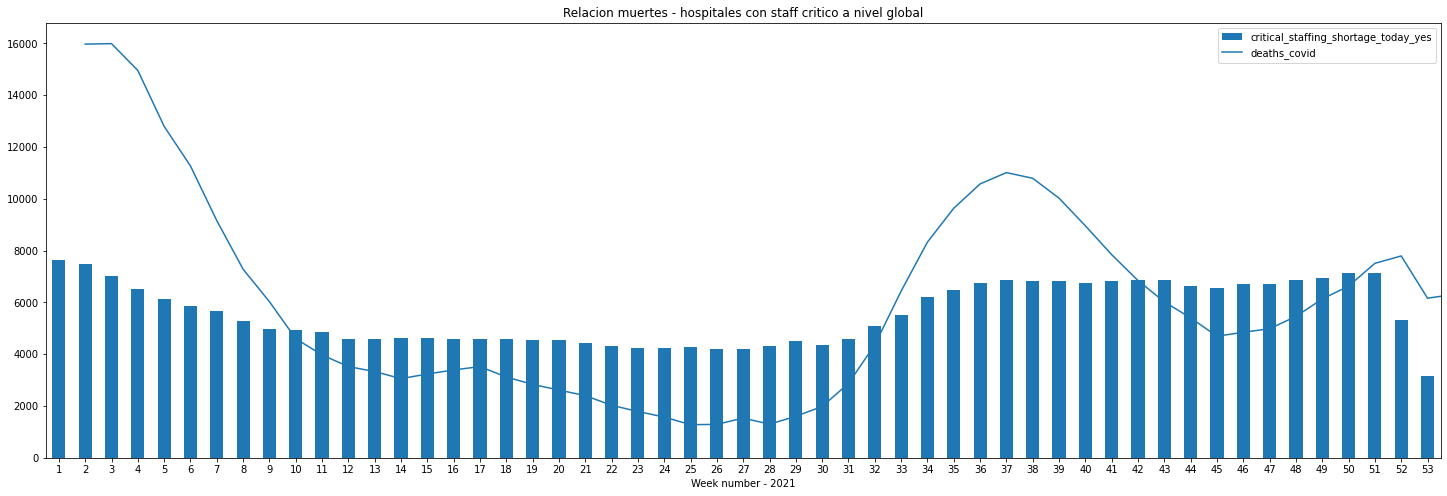

In [49]:
plt.figure(figsize = (25, 8))

df_7_staffing_global.plot(kind='bar',legend='Reverse')
df_7_deaths_global.plot(kind='line',legend='Reverse')

plt.xlabel("Week number - 2021")

plt.title("Relacion muertes - hospitales con staff critico a nivel global")

plt.show()

8 - Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias.

- critical_staffing_shortage_today_yes -> 3. Number of hospitals reporting a critical staffing shortage today in this state.
- previous_day_admission_adult_covid_confirmed -> 17. Number of patients who were admitted to an adult inpatient bed on the previous calendar day who had confirmed COVID-19 at the time of admission in this state
- inpatient_beds_utilization -> 41. Percentage of inpatient beds that are being utilized in this state. This number only accounts for hospitals in the state that report both "inpatient_beds_used" and "inpatient_beds" fields.
- inpatient_bed_covid_utilization -> 49. Percentage of total (used/available) inpatient beds currently utilized by patients who have suspected or confirmed COVID-19 in this state. This number only accounts for hospitals in the state that report both "inpatient_beds_used_covid" and "inpatient_beds" fields
- adult_icu_bed_covid_utilization -> 53. Percentage of total staffed adult ICU beds currently utilized by patients who have suspected or confirmed COVID-19 in this state. This number only accounts for hospitals in the state that report both "staffed_icu_adult_patients_confirmed_and_suspected_covid" and "total_staffed_adult_icu_beds" fields. 
- adult_icu_bed_utilization -> 57. Percentage of staffed adult ICU beds that are being utilized in this state. This number only accounts for hospitals in the state that report both "staffed_adult_icu_bed_occupancy" and "total_staffed_adult_icu_beds" fields.
- deaths_covid -> Number of patients with suspected or confirmed COVID-19 who died on the previous calendar day in the hospital, ED, or overflow location

In [24]:
df_mask = df_report['date'] < '2021-01-01'
df_8 = df_report[df_mask]

df_mask = df_8['date'] >= '2020-01-01'
df_8 = df_8[df_mask]

df_8.sort_values(by='date', ascending = True,
                 inplace = True)
df_8 = df_8.reset_index(drop=True)

df_8['month'] = df_8['date'].dt.month

df_8 = df_8[['date','state','month','deaths_covid','critical_staffing_shortage_today_yes','previous_day_admission_adult_covid_confirmed','inpatient_beds_utilization','inpatient_bed_covid_utilization','adult_icu_bed_covid_utilization','adult_icu_bed_utilization']]

In [25]:
print(df_8.head(3))

        date state  month  deaths_covid  critical_staffing_shortage_today_yes  \
0 2020-01-01    MN      1           0.0                                     0   
1 2020-01-01    NC      1           0.0                                     0   
2 2020-01-01    IN      1           0.0                                     0   

   previous_day_admission_adult_covid_confirmed  inpatient_beds_utilization  \
0                                           NaN                         NaN   
1                                           NaN                         NaN   
2                                           NaN                         0.5   

   inpatient_bed_covid_utilization  adult_icu_bed_covid_utilization  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              0.0                              NaN   

   adult_icu_bed_utilization  
0                        NaN  
1          

In [26]:
data = np.array(['0','1', '2', '3', '4', '5','6','7','8','9','10','11','12']) 
df_8_month = pd.Series(data) 

df_8_deaths = df_8.groupby(['month'])['deaths_covid'].sum()
df_8_staffing = df_8.groupby(['month'])['critical_staffing_shortage_today_yes'].sum()
df_8_admission_confirmed = df_8.groupby(['month'])['previous_day_admission_adult_covid_confirmed'].sum()

df_8_staffing_bed_utilization = df_8.groupby(['month'])['inpatient_beds_utilization'].mean()
df_8_staffing_bed_covid_utilization = df_8.groupby(['month'])['inpatient_bed_covid_utilization'].mean()
df_8_staffing_icu_bed_utilization = df_8.groupby(['month'])['adult_icu_bed_utilization'].mean()
df_8_staffing_icu_bed_covid_utilization = df_8.groupby(['month'])['adult_icu_bed_covid_utilization'].mean()



In [27]:
#Convertimos a dataframe
df_8_union = pd.concat([df_8_month,df_8_deaths,df_8_staffing,df_8_admission_confirmed,df_8_staffing_bed_utilization,df_8_staffing_bed_covid_utilization,df_8_staffing_icu_bed_utilization, df_8_staffing_icu_bed_covid_utilization],axis=1)
df_8_union.columns = ["month","deaths",'staffing_critical','admission','staffing_bed_utilization','staffing_bed_covid_utilization','staffing_icu_bed_utilization','staffing_icu_bed_covid_utilization']

df_8_union=df_8_union.drop(df_8_union.index[[0]])

print(df_8_union)

   month   deaths  staffing_critical  admission  staffing_bed_utilization  \
1      1    145.0               80.0      660.0                  0.434133   
2      2      0.0                0.0        0.0                  0.461779   
3      3   1118.0                0.0       21.0                  0.519888   
4      4  33572.0               30.0     1810.0                  0.512975   
5      5  54884.0                6.0     1898.0                  0.601061   
6      6  17541.0               48.0     1508.0                  0.637921   
7      7  19178.0            10028.0    82899.0                  0.662301   
8      8  31259.0            24210.0   136359.0                  0.662677   
9      9  15245.0            25950.0   109792.0                  0.659806   
10    10  17963.0            29017.0   165563.0                  0.679010   
11    11  33435.0            32499.0   313267.0                  0.686834   
12    12  56674.0            37425.0   454790.0                  0.692573   

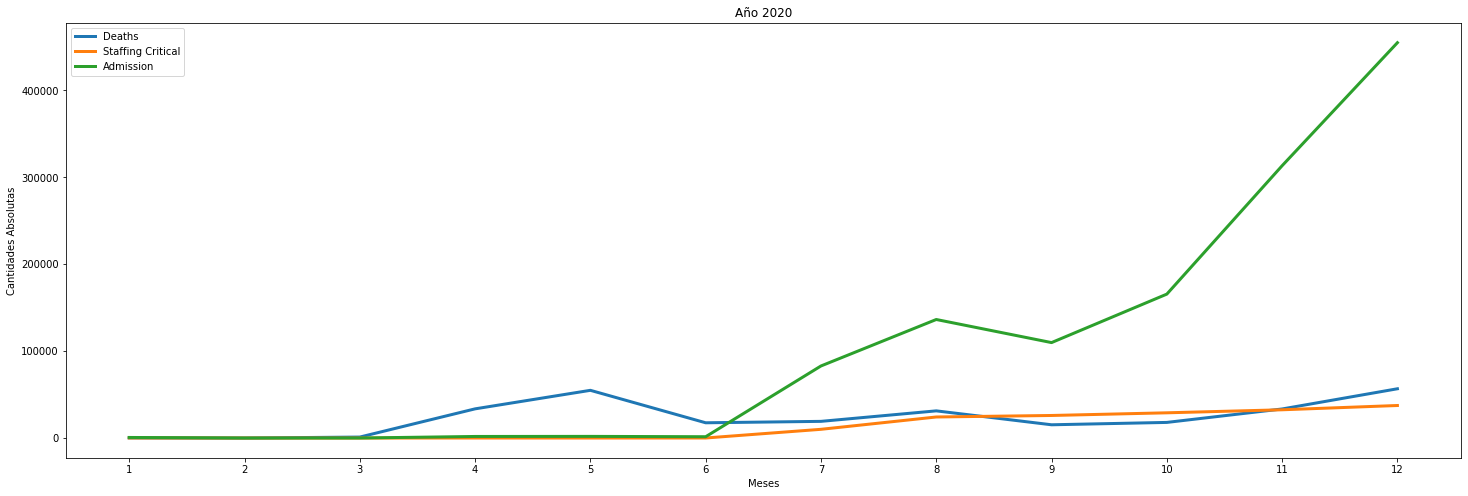

In [28]:
plt.figure(figsize = (25,8))
plt.plot(df_8_union['month'], df_8_union['deaths'], lw=3, label ='Deaths')
plt.plot(df_8_union['month'], df_8_union['staffing_critical'], lw=3, label='Staffing Critical')
plt.plot(df_8_union['month'], df_8_union['admission'], lw=3, label = 'Admission')

#plt.scatter(df_8_union['month'], df_8_union['deaths'],s=55,c='r')

plt.xlabel('Meses')
plt.ylabel('Cantidades Absolutas')

plt.title('Año 2020')
plt.legend()

plt.show()

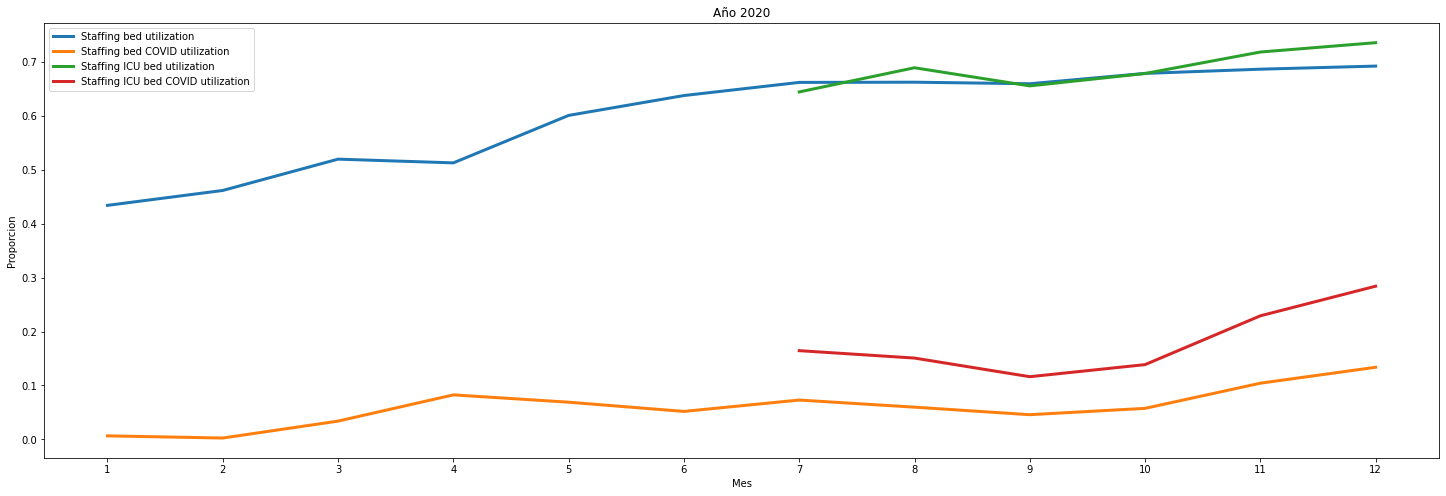

In [29]:
plt.figure(figsize = (25,8))

plt.plot(df_8_union['month'], df_8_union['staffing_bed_utilization'], lw=3,label='Staffing bed utilization')
plt.plot(df_8_union['month'], df_8_union['staffing_bed_covid_utilization'], lw=3, label = 'Staffing bed COVID utilization')
plt.plot(df_8_union['month'], df_8_union['staffing_icu_bed_utilization'], lw=3, label = 'Staffing ICU bed utilization')
plt.plot(df_8_union['month'], df_8_union['staffing_icu_bed_covid_utilization'], lw=3, label = 'Staffing ICU bed COVID utilization')

#plt.scatter(df_8_union['month'], df_8_union['deaths'],s=55,c='r')

plt.xlabel('Mes')
plt.ylabel('Proporcion')

plt.title('Año 2020')
plt.legend()

plt.show()

Maximos para cada columna

In [41]:
names = ["deaths",'staffing_critical','admission','staffing_bed_utilization','staffing_bed_covid_utilization','staffing_icu_bed_utilization','staffing_icu_bed_covid_utilization']

for i in names:
    maxValueIndex = df_8_union[i].idxmax() 
 
    print("El valor maximo de la columna",i," se da en el mes: ",df_8_union['month'][maxValueIndex]) 
     

El valor maximo de la columna deaths  se da en el mes:  12
El valor maximo de la columna staffing_critical  se da en el mes:  12
El valor maximo de la columna admission  se da en el mes:  12
El valor maximo de la columna staffing_bed_utilization  se da en el mes:  12
El valor maximo de la columna staffing_bed_covid_utilization  se da en el mes:  12
El valor maximo de la columna staffing_icu_bed_utilization  se da en el mes:  12
El valor maximo de la columna staffing_icu_bed_covid_utilization  se da en el mes:  12


### Dashboard
Columnas a utilizar:
- cantidad de hospitalizados debido al COVID-19 por Estado -> **total_adult_patients_hospitalized_confirmed_covid** (33. Reported patients currently hospitalized in an adult inpatient bed who have laboratory-confirmed COVID-19. This include those in observation beds.).
- Uso de camas UCI por Estado -> **adult_icu_bed_utilization** (57. Percentage of staffed adult ICU beds that are being utilized in this state. This number only accounts for hospitals in the state that report both "staffed_adult_icu_bed_occupancy" and "total_staffed_adult_icu_beds" fields.
- Ranking de Estados con mayor ocupación hospitalaria por COVID -> **inpatient_bed_covid_utilization** (49. Percentage of total (used/available) inpatient beds currently utilized by patients who have suspected or confirmed COVID-19 in this state. This number only accounts for hospitals in the state that report both "inpatient_beds_used_covid" and "inpatient_beds" fields..
- Cantidad de camas ocupadas por COVID-19 entre dos fechas elegidas por el usuario -> **total_adult_patients_hospitalized_confirmed_covid** (33. Reported patients currently hospitalized in an adult inpatient bed who have laboratory-confirmed COVID-19. This include those in observation beds).

Se va a trabajar con los datos agregados por semana, abarcando todo el 2020 y 2021.

In [5]:
df_mask = df_report['date'] < '2022-01-01'
df_dash = df_report[df_mask]

df_mask = df_dash['date'] >= '2020-01-01'
df_dash = df_dash[df_mask]

df_dash.sort_values(by='date', ascending = True,
                 inplace = True)
df_dash = df_dash.reset_index(drop=True)

df_dash['year'] = df_dash['date'].dt.year
df_dash['Week_Number'] = df_dash['date'].dt.isocalendar().week
df_dash["Periodo"] = df_dash['year']*100+df_dash['Week_Number'] # Identificador de semana mas anio -> anio*100 + semana.



df_dash = df_dash[['date','state','year','Week_Number','Periodo','total_adult_patients_hospitalized_confirmed_covid','inpatient_bed_covid_utilization','adult_icu_bed_utilization']]


df_dash_group_patient_confirmed = df_dash.groupby(['state','Periodo'])['total_adult_patients_hospitalized_confirmed_covid'].sum()

In [4]:
print(df_dash.tail(3))

            date state  year  Week_Number  Periodo  \
35918 2021-12-31    NM  2021           52   202152   
35919 2021-12-31    MT  2021           52   202152   
35920 2021-12-31    DE  2021           52   202152   

       total_adult_patients_hospitalized_confirmed_covid  \
35918                                              511.0   
35919                                              143.0   
35920                                              470.0   

       inpatient_bed_covid_utilization  adult_icu_bed_utilization  
35918                         0.125445                   0.910314  
35919                         0.050488                   0.684685  
35920                         0.151152                   0.820000  


In [12]:
print(df_dash_group_patient_confirmed['NY'])

12869.0
